In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
sns.set(rc={'figure.figsize': (12,6)})

In [287]:
path_microsoft = "../../data/Microsoft_Stock.csv"
path_stack_overflow = "../../data/MLTollsStackOverflow.csv"
path_fires_brazil = "../../data/amazon.csv"

df_microsoft = pd.read_csv(path_microsoft)
df_stack = pd.read_csv(path_stack_overflow)
df_fires = pd.read_csv(path_fires_brazil, encoding='ISO-8859-1')

## Microsoft Series

In [288]:
df_microsoft.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [289]:
df_microsoft.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [290]:
df_microsoft.shape

(1511, 6)

In [291]:
df_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [292]:
df_microsoft['Date'].unique()

array(['4/1/2015 16:00:00', '4/2/2015 16:00:00', '4/6/2015 16:00:00', ...,
       '3/29/2021 16:00:00', '3/30/2021 16:00:00', '3/31/2021 16:00:00'],
      dtype=object)

In [293]:
df_microsoft['Date'] = pd.to_datetime(df_microsoft['Date'])

In [294]:
df_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [295]:
df_microsoft = df_microsoft.set_index('Date')

In [296]:
df_microsoft.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


<Axes: xlabel='Date'>

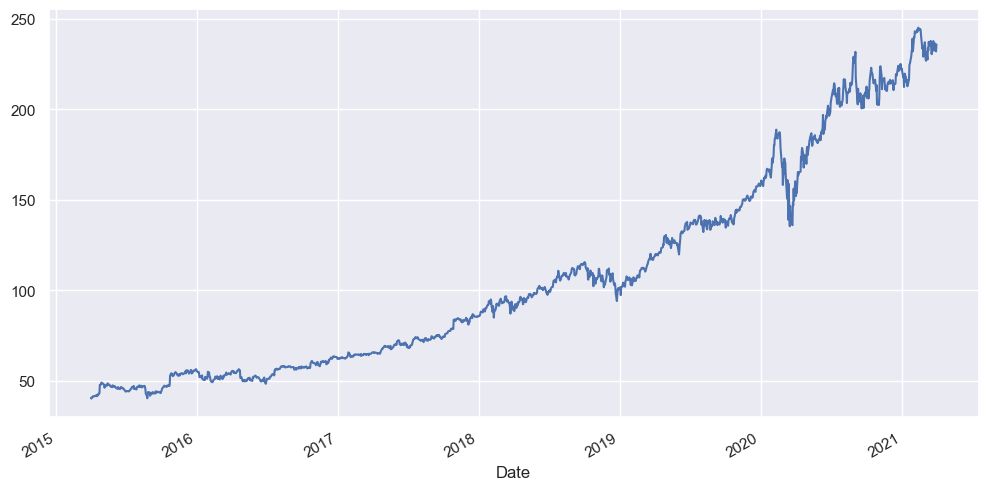

In [297]:
df_microsoft['Close'].plot()

## StackOverflow Series

In [298]:
df_stack.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [299]:
df_stack.tail()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
127,19-Aug,57,76,24,20257,4486,1111,212,371,583,...,0,33,0,22,144,0,0,40,16,25
128,19-Sep,54,62,16,19207,4474,1020,135,362,538,...,0,39,0,15,147,0,4,49,28,16
129,19-Oct,73,79,27,23414,5138,1310,188,523,750,...,0,72,0,27,170,0,3,70,21,19
130,19-Nov,72,79,14,23602,4883,1297,199,479,918,...,0,58,2,14,182,0,1,73,16,19
131,19-Dec,82,72,13,20058,4150,1118,159,349,983,...,0,56,0,13,173,0,0,56,16,18


In [300]:
df_stack.shape

(132, 82)

In [301]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  132 non-null    object 
 1   nltk                   132 non-null    int64  
 2   spacy                  132 non-null    int64  
 3   stanford-nlp           132 non-null    int64  
 4   python                 132 non-null    int64  
 5   r                      132 non-null    int64  
 6   numpy                  132 non-null    int64  
 7   scipy                  132 non-null    int64  
 8   matlab                 132 non-null    int64  
 9   machine-learning       132 non-null    int64  
 10  pandas                 132 non-null    int64  
 11  pytorch                132 non-null    int64  
 12  keras                  132 non-null    int64  
 13  nlp                    132 non-null    int64  
 14  apache-spark           132 non-null    int64  
 15  hadoop

In [302]:
df_stack['month'].unique()

array(['09-Jan', '09-Feb', '09-Mar', '09-Apr', '09-May', '09-Jun',
       '09-Jul', '09-Aug', '09-Sep', '09-Oct', '09-Nov', '09-Dec',
       '10-Jan', '10-Feb', '10-Mar', '10-Apr', '10-May', '10-Jun',
       '10-Jul', '10-Aug', '10-Sep', '10-Oct', '10-Nov', '10-Dec',
       '11-Jan', '11-Feb', '11-Mar', '11-Apr', '11-May', '11-Jun',
       '11-Jul', '11-Aug', '11-Sep', '11-Oct', '11-Nov', '11-Dec',
       '12-Jan', '12-Feb', '12-Mar', '12-Apr', '12-May', '12-Jun',
       '12-Jul', '12-Aug', '12-Sep', '12-Oct', '12-Nov', '12-Dec',
       '13-Jan', '13-Feb', '13-Mar', '13-Apr', '13-May', '13-Jun',
       '13-Jul', '13-Aug', '13-Sep', '13-Oct', '13-Nov', '13-Dec',
       '14-Jan', '14-Feb', '14-Mar', '14-Apr', '14-May', '14-Jun',
       '14-Jul', '14-Aug', '14-Sep', '14-Oct', '14-Nov', '14-Dec',
       '15-Jan', '15-Feb', '15-Mar', '15-Apr', '15-May', '15-Jun',
       '15-Jul', '15-Aug', '15-Sep', '15-Oct', '15-Nov', '15-Dec',
       '16-Jan', '16-Feb', '16-Mar', '16-Apr', '16-May', '16-J

In [303]:
df_stack_python = df_stack[['month', 'python']]

In [304]:
df_stack_python.head()

,month,python
0,09-Jan,631
1,09-Feb,633
2,09-Mar,766
3,09-Apr,768
4,09-May,1003


In [305]:
df_stack_python.tail()

,month,python
127,19-Aug,20257
128,19-Sep,19207
129,19-Oct,23414
130,19-Nov,23602
131,19-Dec,20058


In [306]:
date = pd.date_range(start='2009-1-31', end = '2019-12-31', freq='ME')

date = pd.Series(date)
date.dt.strftime("%d-%m-%Y")

0      31-01-2009
1      28-02-2009
2      31-03-2009
3      30-04-2009
4      31-05-2009
          ...    
127    31-08-2019
128    30-09-2019
129    31-10-2019
130    30-11-2019
131    31-12-2019
Length: 132, dtype: object

In [307]:
df_stack_python['month'] = date

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7332\3690472684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stack_python['month'] = date


In [308]:
df_stack_python.head()

,month,python
0,2009-01-31,631
1,2009-02-28,633
2,2009-03-31,766
3,2009-04-30,768
4,2009-05-31,1003


In [309]:
df_stack_python = df_stack_python.set_index('month')

In [310]:
df_stack_python.head()

,python
month,
2009-01-31,631
2009-02-28,633
2009-03-31,766
2009-04-30,768
2009-05-31,1003


<Axes: xlabel='month'>

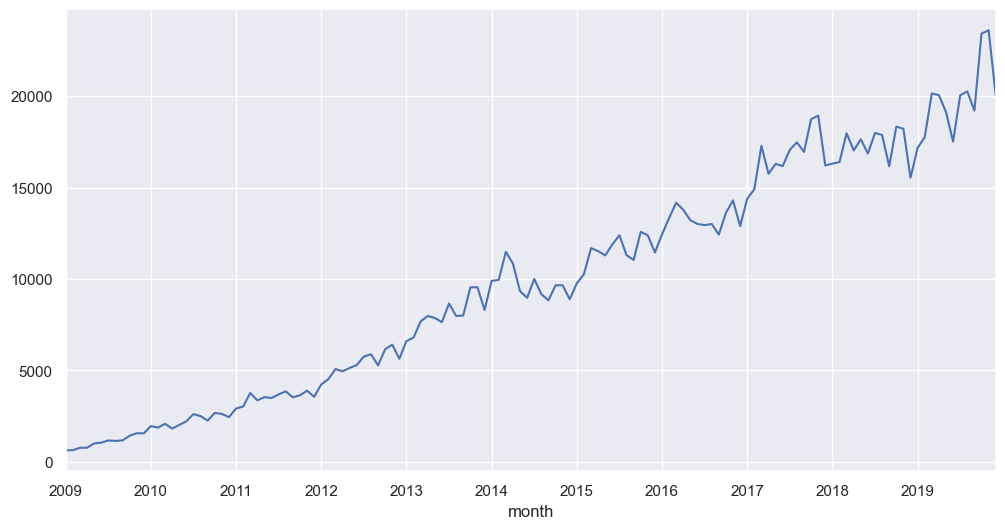

In [311]:
df_stack_python['python'].plot()

## Forest Fires in Brazil Series

In [313]:
df_fires.head(25)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [314]:
df_fires.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [315]:
df_fires.shape

(6454, 5)

In [316]:
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [317]:
df_fires['date'].unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
      dtype=object)

In [318]:
df_fires_amazonas = df_fires[df_fires['state'] == "Amazonas"]

In [319]:
df_fires_amazonas

,year,state,month,number,date
718,1998,Amazonas,Janeiro,0.0,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01
720,2000,Amazonas,Janeiro,7.0,2000-01-01
721,2001,Amazonas,Janeiro,3.0,2001-01-01
722,2002,Amazonas,Janeiro,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01
953,2013,Amazonas,Dezembro,236.0,2013-01-01
954,2014,Amazonas,Dezembro,293.0,2014-01-01
955,2015,Amazonas,Dezembro,565.0,2015-01-01


In [320]:
df_fires_amazonas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 718 to 956
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    239 non-null    int64  
 1   state   239 non-null    object 
 2   month   239 non-null    object 
 3   number  239 non-null    float64
 4   date    239 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [321]:
df_fires_amazonas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 718 to 956
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    239 non-null    int64  
 1   state   239 non-null    object 
 2   month   239 non-null    object 
 3   number  239 non-null    float64
 4   date    239 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [322]:
df_fires_amazonas = df_fires_amazonas.sort_values(by='year')

In [323]:
nome_coluna_meses = 'month'

mapa_meses = {
    'Janeiro': '1',
    'Fevereiro': '2',
    'Março': '3',
    'Abril': '4',
    'Maio': '5',
    'Junho': '6',
    'Julho': '7',
    'Agosto': '8',
    'Setembro': '9',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}

df_fires_amazonas[nome_coluna_meses] = df_fires_amazonas[nome_coluna_meses].map(mapa_meses)

In [324]:
df_fires_amazonas.head()

,year,state,month,number,date
718,1998,Amazonas,1,0.0,1998-01-01
838,1998,Amazonas,7,71.0,1998-01-01
798,1998,Amazonas,5,0.0,1998-01-01
858,1998,Amazonas,8,321.0,1998-01-01
778,1998,Amazonas,4,0.0,1998-01-01


In [325]:
df_fires_amazonas['date'] = df_fires_amazonas['year'].astype(str) + '-' + df_fires_amazonas['month'] + '-' + '1'

In [326]:
df_fires_amazonas.head()

,year,state,month,number,date
718,1998,Amazonas,1,0.0,1998-1-1
838,1998,Amazonas,7,71.0,1998-7-1
798,1998,Amazonas,5,0.0,1998-5-1
858,1998,Amazonas,8,321.0,1998-8-1
778,1998,Amazonas,4,0.0,1998-4-1


In [327]:
df_fires_amazonas['date'] = pd.to_datetime(df_fires_amazonas['date'])

In [330]:
df_fires_amazonas = df_fires_amazonas.sort_values(by='date')

In [333]:
df_fires_amazonas.head(10)

,year,state,month,number,date
718,1998,Amazonas,1,0.0,1998-01-01
738,1998,Amazonas,2,0.0,1998-02-01
758,1998,Amazonas,3,0.0,1998-03-01
778,1998,Amazonas,4,0.0,1998-04-01
798,1998,Amazonas,5,0.0,1998-05-01
818,1998,Amazonas,6,2.0,1998-06-01
838,1998,Amazonas,7,71.0,1998-07-01
858,1998,Amazonas,8,321.0,1998-08-01
878,1998,Amazonas,9,267.0,1998-09-01
898,1998,Amazonas,10,83.0,1998-10-01


In [335]:
df_fires_amazonas = df_fires_amazonas.set_index('date')

<Axes: xlabel='date'>

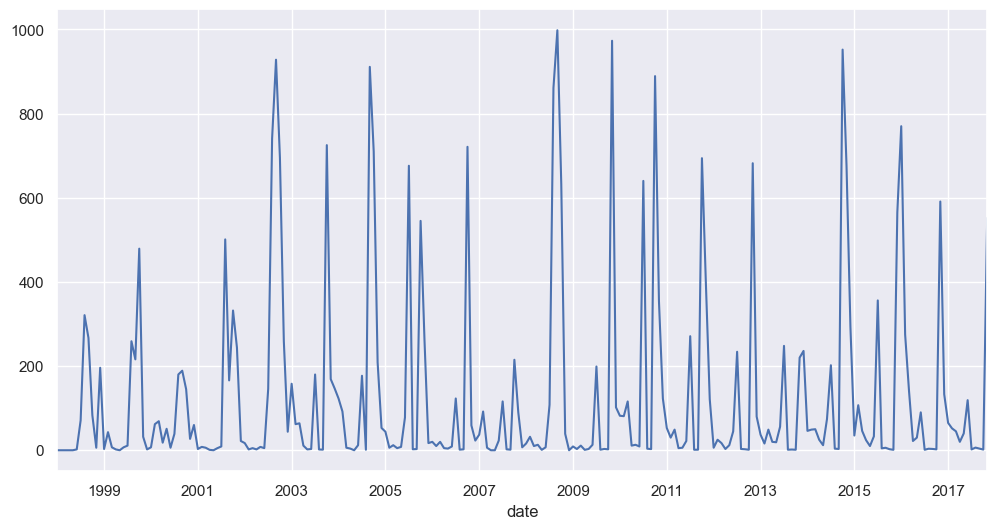

In [336]:
df_fires_amazonas['number'].plot()